# Credit Card Risk Prediction

In [20]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
df = pd.read_csv('creditcarddataset.csv')

In [22]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


## Performing EDA

In [23]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,...,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000,57355.000000
mean,94577.357074,-0.029092,0.030156,-0.055749,0.035521,-0.022664,-0.006869,-0.032448,0.006142,-0.017667,...,0.005569,-0.000265,0.003273,0.001159,0.005003,0.003133,0.000226,-0.000625,88.825575,0.008578
std,47505.713234,2.061391,1.711228,1.733364,1.484621,1.508300,1.361819,1.504317,1.334058,1.131679,...,0.813950,0.734597,0.625238,0.604653,0.519852,0.482496,0.433713,0.323980,279.496913,0.092221
min,2.000000,-36.802320,-63.344698,-48.325589,-5.519697,-113.743307,-19.996349,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-32.828995,-2.822384,-8.696627,-2.534330,-8.878665,-15.430084,0.000000,0.000000
25%,53943.500000,-0.927615,-0.588747,-0.922554,-0.839400,-0.692157,-0.774796,-0.558211,-0.207145,-0.651869,...,-0.226932,-0.541278,-0.161812,-0.354648,-0.312164,-0.322536,-0.070642,-0.052695,5.475000,0.000000
50%,84641.000000,0.015980,0.071801,0.168619,-0.005637,-0.055913,-0.276163,0.035797,0.024380,-0.053373,...,-0.028379,0.004681,-0.011439,0.041286,0.021494,-0.049135,0.000859,0.011169,21.990000,0.000000
75%,139140.000000,1.314129,0.815413,1.019384,0.764271,0.607021,0.387408,0.562758,0.333358,0.599522,...,0.190245,0.529286,0.147282,0.439244,0.352590,0.243882,0.091355,0.078500,76.900000,0.000000
max,172777.000000,2.454930,22.057729,3.940337,16.715537,28.762671,73.301626,120.589494,20.007208,10.348407,...,27.202839,10.503090,22.528412,4.584549,5.826159,3.517346,31.612198,15.866721,25691.160000,1.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57355 entries, 0 to 57354
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    57355 non-null  int64  
 1   V1      57355 non-null  float64
 2   V2      57355 non-null  float64
 3   V3      57355 non-null  float64
 4   V4      57355 non-null  float64
 5   V5      57355 non-null  float64
 6   V6      57355 non-null  float64
 7   V7      57355 non-null  float64
 8   V8      57355 non-null  float64
 9   V9      57355 non-null  float64
 10  V10     57355 non-null  float64
 11  V11     57355 non-null  float64
 12  V12     57355 non-null  float64
 13  V13     57355 non-null  float64
 14  V14     57355 non-null  float64
 15  V15     57355 non-null  float64
 16  V16     57355 non-null  float64
 17  V17     57355 non-null  float64
 18  V18     57355 non-null  float64
 19  V19     57355 non-null  float64
 20  V20     57355 non-null  float64
 21  V21     57355 non-null  float64
 22

In [25]:
df[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,57355.000000,57355.000000,57355.000000
mean,94577.357074,88.825575,0.008578
std,47505.713234,279.496913,0.092221
min,2.000000,0.000000,0.000000
25%,53943.500000,5.475000,0.000000
50%,84641.000000,21.990000,0.000000
75%,139140.000000,76.900000,0.000000
max,172777.000000,25691.160000,1.000000


In [26]:
df['Class'].value_counts()

0    56863
1      492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

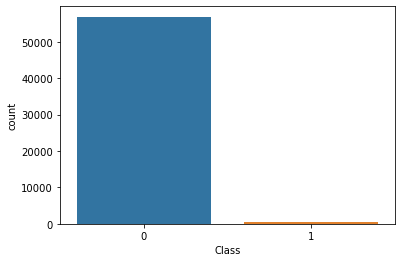

In [27]:
sns.countplot(x = 'Class', data=df)

#### The data contains a lot of class imbalance, which may lead to biased models, we may be able to mitigate this by using the same amount of class 0 as well as generating some sample data using the given features.The balance of classes is highly skewed when it comes to fraud detection.

### Categorizing Normal and fraud transaction

In [28]:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

print("Fraud transaction statistics")
print(df_fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    56863.000000
mean        88.536709
std        279.670869
min          0.000000
25%          5.540000
50%         22.000000
75%         76.230000
max      25691.160000
Name: Amount, dtype: float64


### Visualizing correlation matrix 

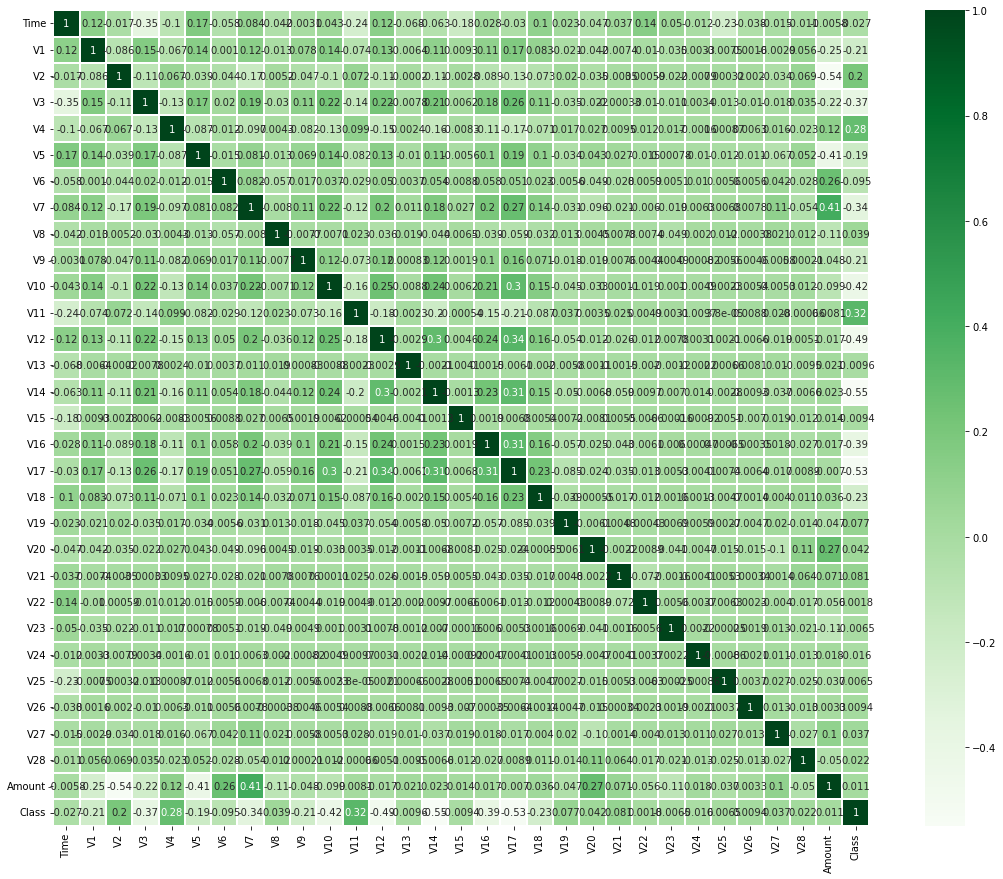

In [29]:
colormap = plt.cm.Greens
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

## Removing unnecessary columns

In [30]:
df = df.drop(['Amount', 'Time'], axis = 1)
X = df.drop(['Class'], axis = 1)
y = df['Class']

## Train — Validation — Test

In [31]:
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

## Normalize input

In [32]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

Visualize Class Distribution in Train, Val, and Test

In [33]:
def get_class_distribution(obj):
    count_dict = {
        "rating_0": 0,
        "rating_1": 0,
    }
    
    for i in obj:
        if i == 0: 
            count_dict['rating_0'] += 1  
        elif i == 1: 
            count_dict['rating_1'] += 1              
        else:
            print("Check classes.")
            
    return count_dict

Text(0.5, 1.0, 'Class Distribution in Test Set')

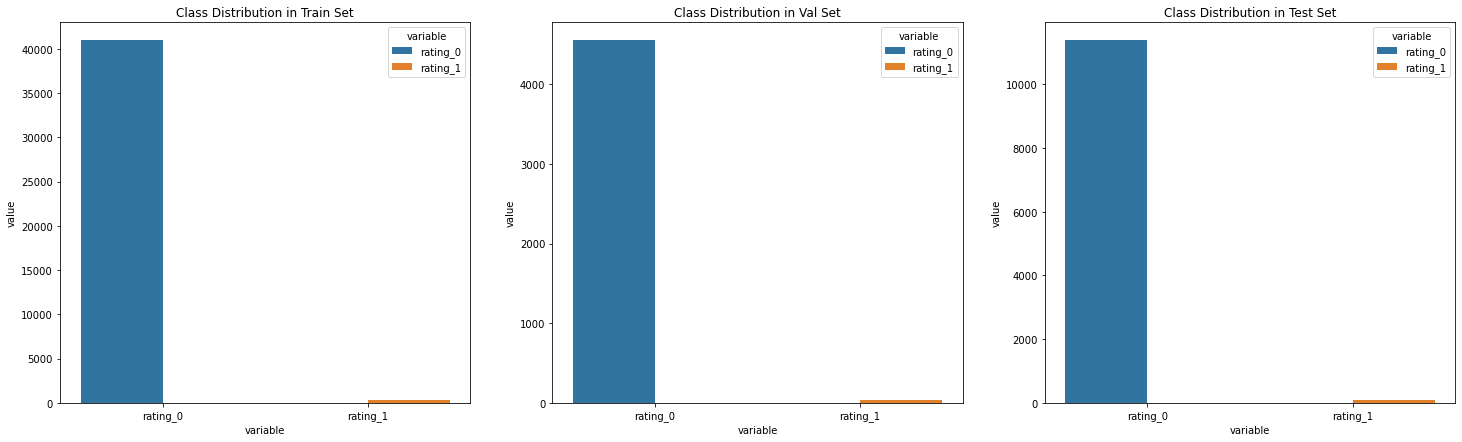

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,7))
# Train
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_train)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[0]).set_title('Class Distribution in Train Set')
# Validation
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_val)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[1]).set_title('Class Distribution in Val Set')
# Test
sns.barplot(data = pd.DataFrame.from_dict([get_class_distribution(y_test)]).melt(), x = "variable", y="value", hue="variable",  ax=axes[2]).set_title('Class Distribution in Test Set')

## Neural Networks

Importnig torch libraries

In [68]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from tqdm.notebook import tqdm

In [69]:
!pip install "tqdm==4.43.0"

## Custom Dataset

In [70]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

## Weighted Sampling

In [71]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

In [72]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([2.4426e-05, 2.8169e-03])


In [73]:
class_weights_all = class_weights[target_list]

In [74]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [75]:
EPOCHS = 300
BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 2

## Data Loader

In [76]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

## Defining the neural net architecture

In [77]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [78]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


Its not running in cuda

In [79]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
#gpu code
#model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)

#gpu code
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=28, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [80]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [81]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

## Training the model

In [82]:
print("Start training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        # get the inputs
        X_train_batch, y_train_batch = X_train_batch, y_train_batch
        optimizer.zero_grad()
        
        # forward + backward + optimize
        y_train_pred = model(X_train_batch)
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            # get the inputs
            X_val_batch, y_val_batch = X_val_batch, y_val_batch
            
            #gpu code
            #X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    # print statistics
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')

Start training.


Epoch 001: | Train Loss: 0.07254 | Val Loss: 0.04150 | Train Acc: 99.287| Val Acc: 99.063
Epoch 002: | Train Loss: 0.04050 | Val Loss: 0.01819 | Train Acc: 99.676| Val Acc: 99.717
Epoch 003: | Train Loss: 0.03904 | Val Loss: 0.07242 | Train Acc: 99.657| Val Acc: 97.821
Epoch 004: | Train Loss: 0.06260 | Val Loss: 0.02681 | Train Acc: 99.612| Val Acc: 99.542
Epoch 005: | Train Loss: 0.03377 | Val Loss: 0.02077 | Train Acc: 99.742| Val Acc: 99.608
Epoch 006: | Train Loss: 0.03463 | Val Loss: 0.01703 | Train Acc: 99.861| Val Acc: 99.651
Epoch 007: | Train Loss: 0.04130 | Val Loss: 0.04902 | Train Acc: 99.686| Val Acc: 98.693
Epoch 008: | Train Loss: 0.03885 | Val Loss: 0.02724 | Train Acc: 99.686| Val Acc: 99.346
Epoch 009: | Train Loss: 0.04174 | Val Loss: 0.02530 | Train Acc: 99.772| Val Acc: 99.521
Epoch 010: | Train Loss: 0.02627 | Val Loss: 0.02419 | Train Acc: 99.788| Val Acc: 99.630
Epoch 011: | Train Loss: 0.03153 | Val Loss: 0.04165 | Train Acc: 99.784| Val Acc: 98.932
Epoch 012:

Epoch 093: | Train Loss: 0.01981 | Val Loss: 0.03151 | Train Acc: 99.786| Val Acc: 99.412
Epoch 094: | Train Loss: 0.01337 | Val Loss: 0.03593 | Train Acc: 99.775| Val Acc: 99.281
Epoch 095: | Train Loss: 0.01853 | Val Loss: 0.03191 | Train Acc: 99.756| Val Acc: 99.216
Epoch 096: | Train Loss: 0.01353 | Val Loss: 0.03015 | Train Acc: 99.861| Val Acc: 99.412
Epoch 097: | Train Loss: 0.01057 | Val Loss: 0.02920 | Train Acc: 99.849| Val Acc: 99.586
Epoch 098: | Train Loss: 0.01605 | Val Loss: 0.04257 | Train Acc: 99.793| Val Acc: 98.823
Epoch 099: | Train Loss: 0.01146 | Val Loss: 0.03896 | Train Acc: 99.814| Val Acc: 98.932
Epoch 100: | Train Loss: 0.01995 | Val Loss: 0.06481 | Train Acc: 99.737| Val Acc: 97.973
Epoch 101: | Train Loss: 0.00903 | Val Loss: 0.02780 | Train Acc: 99.805| Val Acc: 99.630
Epoch 102: | Train Loss: 0.01975 | Val Loss: 0.04303 | Train Acc: 99.728| Val Acc: 99.194
Epoch 103: | Train Loss: 0.01654 | Val Loss: 0.04738 | Train Acc: 99.684| Val Acc: 98.693
Epoch 104:

Epoch 185: | Train Loss: 0.01102 | Val Loss: 0.04017 | Train Acc: 99.821| Val Acc: 99.368
Epoch 186: | Train Loss: 0.01242 | Val Loss: 0.04086 | Train Acc: 99.772| Val Acc: 99.281
Epoch 187: | Train Loss: 0.01226 | Val Loss: 0.03837 | Train Acc: 99.765| Val Acc: 99.455
Epoch 188: | Train Loss: 0.01702 | Val Loss: 0.04367 | Train Acc: 99.786| Val Acc: 99.041
Epoch 189: | Train Loss: 0.01277 | Val Loss: 0.04979 | Train Acc: 99.768| Val Acc: 98.910
Epoch 190: | Train Loss: 0.01228 | Val Loss: 0.05097 | Train Acc: 99.744| Val Acc: 99.324
Epoch 191: | Train Loss: 0.01201 | Val Loss: 0.04368 | Train Acc: 99.805| Val Acc: 99.041
Epoch 192: | Train Loss: 0.01676 | Val Loss: 0.03556 | Train Acc: 99.716| Val Acc: 99.630
Epoch 193: | Train Loss: 0.01456 | Val Loss: 0.04940 | Train Acc: 99.805| Val Acc: 98.845
Epoch 194: | Train Loss: 0.01132 | Val Loss: 0.03436 | Train Acc: 99.740| Val Acc: 99.390
Epoch 195: | Train Loss: 0.01157 | Val Loss: 0.04653 | Train Acc: 99.786| Val Acc: 98.954
Epoch 196:

Epoch 277: | Train Loss: 0.01000 | Val Loss: 0.04915 | Train Acc: 99.840| Val Acc: 99.303
Epoch 278: | Train Loss: 0.01192 | Val Loss: 0.05120 | Train Acc: 99.819| Val Acc: 99.324
Epoch 279: | Train Loss: 0.01611 | Val Loss: 0.04750 | Train Acc: 99.791| Val Acc: 99.172
Epoch 280: | Train Loss: 0.00705 | Val Loss: 0.03774 | Train Acc: 99.856| Val Acc: 99.586
Epoch 281: | Train Loss: 0.01435 | Val Loss: 0.06749 | Train Acc: 99.795| Val Acc: 98.780
Epoch 282: | Train Loss: 0.00816 | Val Loss: 0.11258 | Train Acc: 99.840| Val Acc: 99.041
Epoch 283: | Train Loss: 0.01165 | Val Loss: 0.03590 | Train Acc: 99.814| Val Acc: 99.455
Epoch 284: | Train Loss: 0.01193 | Val Loss: 0.10493 | Train Acc: 99.830| Val Acc: 98.910
Epoch 285: | Train Loss: 0.02967 | Val Loss: 0.06627 | Train Acc: 99.728| Val Acc: 98.889
Epoch 286: | Train Loss: 0.00689 | Val Loss: 0.06389 | Train Acc: 99.842| Val Acc: 99.368
Epoch 287: | Train Loss: 0.00759 | Val Loss: 0.03476 | Train Acc: 99.881| Val Acc: 99.477
Epoch 288:

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

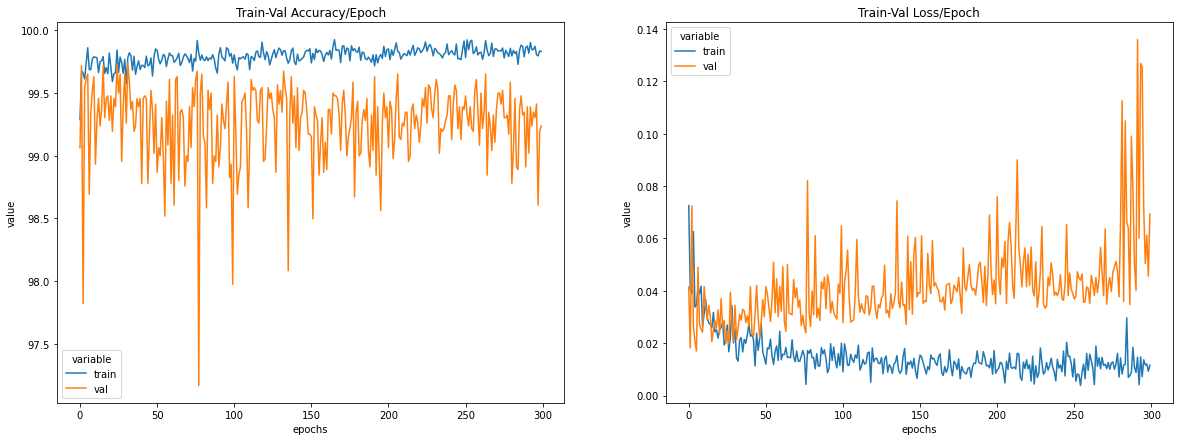

In [83]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})

# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

loss is the sum of the errors in our model. It measures how well (or poorly) the model is performing. If the errors are high, the loss will also be high, which means that the model is not performing well. If the loss is lower, the better our model performs.

## Testing the model

## Identifying the prediction

## Classification Report

In [87]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11373
           1       0.54      0.87      0.67        98

    accuracy                           0.99     11471
   macro avg       0.77      0.93      0.83     11471
weighted avg       0.99      0.99      0.99     11471



Precision seems to be 1.00 which is good In other words, a perfect precision score of 1.0 means that every search result returned was accurate

The search retrieved all relevant documents if a perfect recall score of 0.99 is achieved

There is generally no benefit to having a higher F1 score. F1 scores is 0.99, with representing a model that perfectly classifies each observation into the correct class, and 0 representing a model that cannot classify any observation.